# Akam et al. 2012

### Oscillators as Neural Masses

We will make a toy model of Wilson-Cowan oscillators that exhibit phase reset. The parameters are given in the paper (Methods, subsection _Wilson-Cowan model_). 

In [1]:
sum2 = sum # backup for plotting later

from brian2 import *

INFO       Cache size for target "cython": 1677 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/nikos/.cython/brian_extensions" directory. [brian2]


In [2]:
# Activation function (sigmoid)
@check_units(x=Hz, result=Hz)
def activation(x):
    return 1/(1+exp(-x))

# wrap the activation function
#activation = Function(activation, arg_units=[Hz], return_unit=Hz)

eqs = '''
    dE/dt = 1/tau_E * (-E + 1/(1+exp(-(g_ee*E + g_ei*I + stim_E(t) + a_e)))) + sigma*sqrt(2/tau_E)*xi_E : 1
    dI/dt = 1/tau_I * (-I + 1/(1+exp(-(g_ie*E + g_ii*I + stim_I(t) + a_i)))) + sigma*sqrt(2/tau_I)*xi_I : 1
'''

# Fixed parameters
tau_E = 3*ms
tau_I = 8*ms
g_ee = 10
g_ei = -10
g_ie = 12
g_ii = -10
a_e = -2
a_i = -3.5
sigma = 0.

# simulation
duration = 500*ms

# stimulation
S0 = 10
theta_deg = 85
theta = theta_deg*pi/180
tau_stim = 6*ms
t_stim = 250*ms

# stimulation
#dt_stim = defaultclock.dt
dt_stim = 1*ms
tv = linspace(0, int(duration/msecond), int(duration/dt_stim+1))
stim_E_tv = S0*cos(theta)*1*(tv>t_stim/msecond)*exp(-(tv-t_stim/msecond)/(tau_stim/msecond))
stim_I_tv = S0*sin(theta)*1*(tv>t_stim/msecond)*exp(-(tv-t_stim/msecond)/(tau_stim/msecond))


stim_E = TimedArray(stim_E_tv, dt=dt_stim)
stim_I = TimedArray(stim_I_tv, dt=dt_stim)

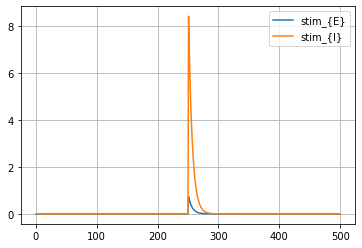

In [3]:
plot(tv, stim_E_tv, label=r'stim_{E}')
plot(tv, stim_I_tv, label=r'stim_{I}')
grid()
legend()
show()

In [4]:
# Make oscillator group
G = NeuronGroup(1, model=eqs, method='euler', name='Oscillator')
G.E = 1e-17
G.I = 1e-17

# Monitor the rates
mon = StateMonitor(G, ['E','I'], record=True)

# Make a network
net = Network()
net.add(G)
net.add(mon)

# Run the simulation
net.run(duration)

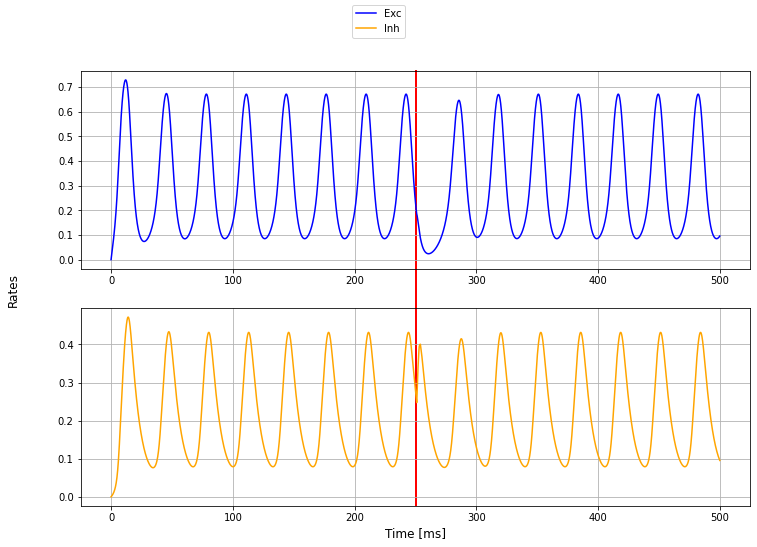

In [7]:
# Plot the results
fig, axs = subplots(2,1)
fig.set_figheight(8)
fig.set_figwidth(12)
axs[0].plot(mon.t/ms, mon.E[0], color='blue', label='Exc')
axs[1].plot(mon.t/ms, mon.I[0], color='orange', label='Inh')

axs[0].grid()
axs[1].grid()

axs[0].axvline(x=t_stim/msecond, ymin=-1, ymax=1, c="red", linewidth=2, zorder=0, clip_on=False)
axs[1].axvline(x=t_stim/msecond, ymin=-1, ymax=1, c="red", linewidth=2, zorder=0, clip_on=True)
axs[1].set_xlabel('Time [ms]', fontsize=12)
fig.text(0.04, 0.5, 'Rates', va='center', rotation='vertical', fontdict={'size' : 12})


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum2(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper center')

show()